Yasmine Elegily - Daily Climate time-series
https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data


# Time Series in IOT
index - date .... column is a label .. univariate
then the ADF test

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
dftrain = pd.read_csv('DailyDelhiClimateTrain.csv')
dftest = pd.read_csv('DailyDelhiClimateTest.csv')

In [ ]:
dftrain[:-10000]

,date,meantemp,humidity,wind_speed,meanpressure


In [ ]:
dftrain

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [ ]:
df1 = dftrain.drop(['humidity','wind_speed','meanpressure'],axis = 1)
df2 = dftest.drop(['humidity','wind_speed','meanpressure'],axis = 1)

In [ ]:
df1

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
...,...,...
1457,2016-12-28,17.217391
1458,2016-12-29,15.238095
1459,2016-12-30,14.095238
1460,2016-12-31,15.052632


In [ ]:
# Convert the datetime column to a datetime type
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])

# Set the datetime column as the index
df1.set_index('date', inplace=True)
df2.set_index('date', inplace=True)

# Print the updated DataFrame
print(df1)

             meantemp
date                 
2013-01-01  10.000000
2013-01-02   7.400000
2013-01-03   7.166667
2013-01-04   8.666667
2013-01-05   6.000000
...               ...
2016-12-28  17.217391
2016-12-29  15.238095
2016-12-30  14.095238
2016-12-31  15.052632
2017-01-01  10.000000

[1462 rows x 1 columns]


In [ ]:
df2

,meantemp
date,
2017-01-01,15.913043
2017-01-02,18.500000
2017-01-03,17.111111
2017-01-04,18.700000
2017-01-05,18.388889
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000


# ADFuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df1['meantemp'])
print('ADF Statistic: ',  result[0])
print('p-value: ', result[1])

ADF Statistic:  -2.0210690559206737
p-value:  0.2774121372301601


In [ ]:
df1.index = pd.to_datetime(df1.index.date)
df2.index = pd.to_datetime(df2.index.date)


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df2['meantemp'])
print('ADF Statistic_test: ',  result[0])
print('p-value_test: ', result[1])

ADF Statistic_test:  -1.096474275875619
p-value_test:  0.7164758731775932


In [ ]:
df1

,meantemp
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
...,...
2016-12-28,17.217391
2016-12-29,15.238095
2016-12-30,14.095238
2016-12-31,15.052632


In [ ]:
df2

,meantemp
2017-01-01,15.913043
2017-01-02,18.500000
2017-01-03,17.111111
2017-01-04,18.700000
2017-01-05,18.388889
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000
2017-04-23,32.875000


In [ ]:
square_root_df = df1["meantemp"].values ** (1/2)
square_root_df_test = df2["meantemp"].values ** (1/2)

In [ ]:
df1["meantemp"] = square_root_df
df2["meantemp"] = square_root_df_test

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df1['meantemp'])
print('ADF Statistic_test: ',  result[0])
print('p-value_test: ', result[1])

ADF Statistic_test:  -3.0715011409334
p-value_test:  0.02873538786642193


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df2['meantemp'])
print('ADF Statistic_test: ',  result[0])
print('p-value_test: ', result[1])

ADF Statistic_test:  -1.2397598426520244
p-value_test:  0.6562625616676009


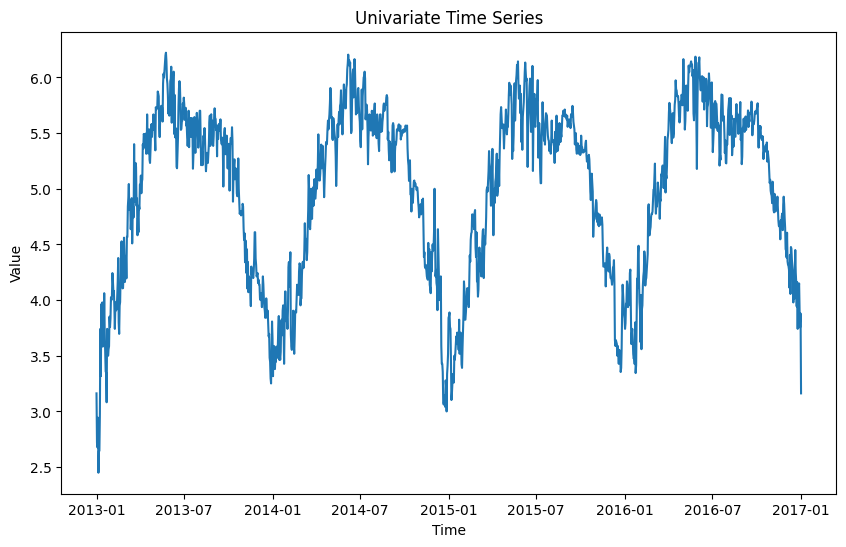

In [ ]:
import matplotlib.pyplot as plt


# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df1)
plt.title('Univariate Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

ARIMA & SARIMA:

Main parameters:


*  p: the number of lag observations in the model, also known as the lag order.
*  d: the number of times the raw observations are differenced; also known as the degree of differencing.
*  q: the size of the moving average window, also known as the order of the moving average.



In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df1['meantemp'],order=(1,0,0)) # 1,0,1/1,0,2/1,1,2
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 509.124
Date:                Wed, 09 Aug 2023   AIC                          -1012.248
Time:                        10:31:00   BIC                           -996.386
Sample:                    01-01-2013   HQIC                         -1006.331
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8830      0.193     25.294      0.000       4.505       5.261
ar.L1          0.9784      0.005    194.828      0.000       0.969       0.988
sigma2         0.0291      0.001     36.766      0.000       0.028       0.031
===================================================================================
Ljung-Box (L1) (Q):                  33.23   Jarque-Bera (JB):               293.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

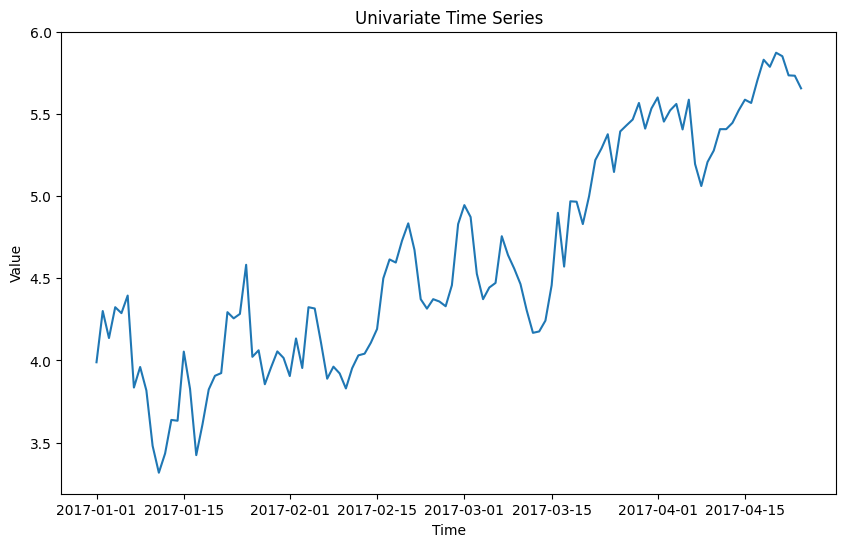

In [ ]:
import matplotlib.pyplot as plt


# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df2)
plt.title('Univariate Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

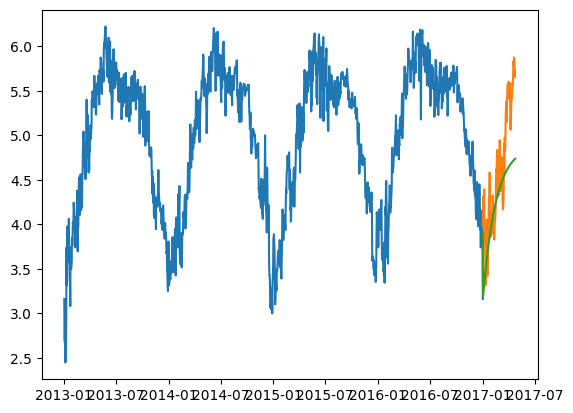

In [ ]:
predictions = model_fit.predict(start=df2.index[0], end=df2.index[-1])
plt.plot(df1.index, df1["meantemp"])
plt.plot(df2.index, df2["meantemp"])
plt.plot(df2.index, predictions)


In [ ]:
# df1['forecast']=model_fit.predict(dynamic=True,order = (1,0,2))
# df1[['meantemp','forecast']].plot(figsize=(12,8))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Axes: >

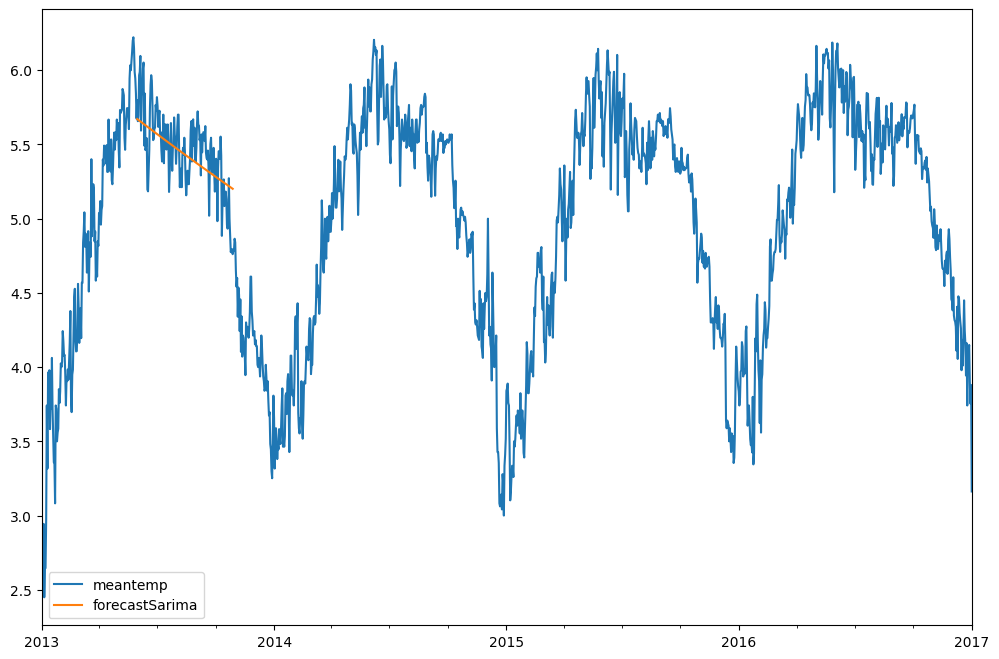

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df1['meantemp'],order=(1,0,0))
results=model.fit()
df1['forecastSarima']=results.predict(start=150,end=300,dynamic=True)
df1[['meantemp','forecastSarima']].plot(figsize=(12,8))